This program uses Moving Average Convergence/Divergence (MACD) crossover to determine when to buy and sell stock.

In [21]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
#Store data into df
df = pd.read_csv('BTC-USD.csv')
# set date to be index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10
...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10


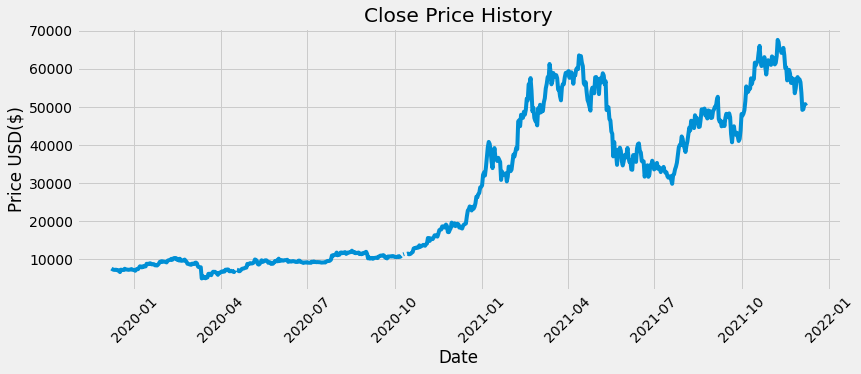

In [23]:
#Visually show stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price USD($)')
plt.show()

In [24]:
#Calculate MACD and signal line indicators
#Short term EMA 12 periods
shortEma = df.Close.ewm(span=12, adjust=False).mean()
#Long term EMA 26 periods
longEma = df.Close.ewm(span=26, adjust=False).mean()
#MACD line
macd = shortEma - longEma
#Signal line 9 periods
signal = macd.ewm(span=9, adjust=False).mean()

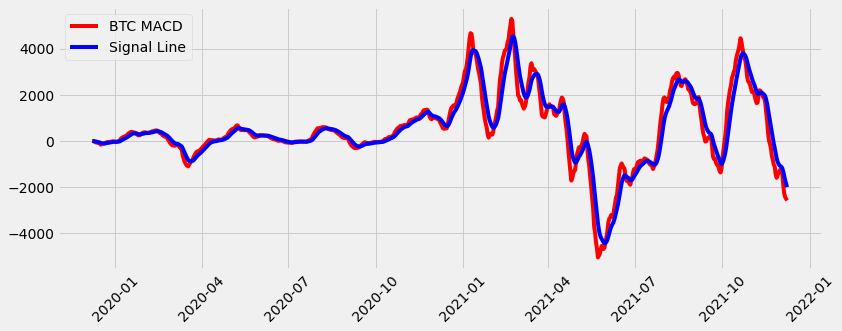

In [25]:
#Plot chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, macd, label='BTC MACD', color='red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [26]:
#Create new columns
df['MACD'] = macd
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,0.000000,0.000000
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,-13.038411,-2.607682
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,-32.899504,-8.666047
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,-52.926824,-17.518202
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,-65.963885,-27.207339
...,...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,-1922.827523,-1329.550333
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,-2274.975367,-1518.635340
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,-2428.123486,-1700.532969
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10,-2511.070302,-1862.640436


In [29]:
#Function to signal buy/sell
def buySell(signal):
    buy = []
    sell = []
    currentTrend = 0
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            # Bullish indicator
            sell.append(np.nan)
            if currentTrend != 1:
                # MACD cross above signal line
                buy.append(signal['Close'][i])
                currentTrend = 1
            else:
                # Existing buy signal
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            # Bearish indicator
            buy.append(np.nan)
            if currentTrend != -1:
                # MACD crosses below signal line
                sell.append(signal['Close'][i])
                currentTrend = -1
            else:
                # Existing sell signal
                sell.append(np.nan)
                
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy, sell)
                

In [30]:
#Create buy and sell column
signal = buySell(df)
df['Buy_Signal_Price'] = signal[0]
df['Sell_Signal_Price'] = signal[1]
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,0.000000,0.000000,NaN,NaN
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,-13.038411,-2.607682,NaN,7400.899414
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,-32.899504,-8.666047,NaN,NaN
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,-52.926824,-17.518202,NaN,NaN
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,-65.963885,-27.207339,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,-1922.827523,-1329.550333,NaN,NaN
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,-2274.975367,-1518.635340,NaN,NaN
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,-2428.123486,-1700.532969,NaN,NaN
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10,-2511.070302,-1862.640436,NaN,NaN


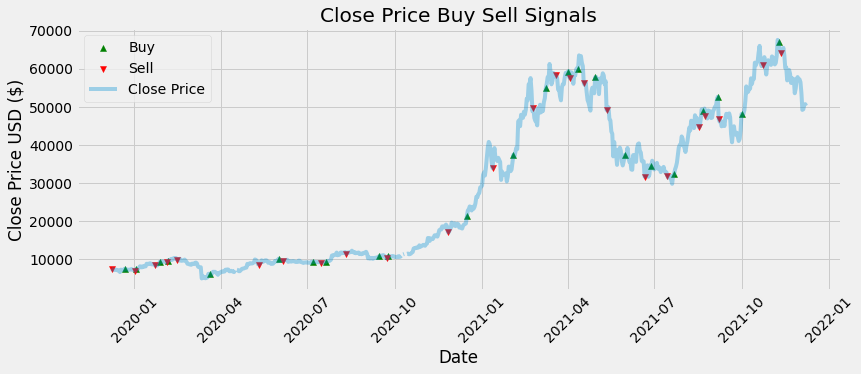

In [31]:
#Visualise buy sell signal
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [33]:
#Tabulate net gains
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,0.000000,0.000000,NaN,NaN
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,-13.038411,-2.607682,NaN,7400.899414
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,-32.899504,-8.666047,NaN,NaN
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,-52.926824,-17.518202,NaN,NaN
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,-65.963885,-27.207339,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,-1922.827523,-1329.550333,NaN,NaN
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,-2274.975367,-1518.635340,NaN,NaN
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,-2428.123486,-1700.532969,NaN,NaN
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10,-2511.070302,-1862.640436,NaN,NaN


In [55]:
# Tabulate netgains
openPosition = False
startingSum = 1000
quantityHeld = 0;
for i in range(0, len(df.index)):
    buyPrice = df['Buy_Signal_Price'][i]
    sellPrice = df['Sell_Signal_Price'][i]
    if(not openPosition and not np.isnan(buyPrice)):
        quantityHeld = startingSum/buyPrice
        openPosition = True
        print(f"Buy {quantityHeld}BTC at {buyPrice}USD")
    if(openPosition and not np.isnan(sellPrice)):
        print(f"Sell {quantityHeld}BTC at {sellPrice}USD, portfolio:{startingSum}")
        startingSum = sellPrice * quantityHeld
        quantityHeld = 0
        openPosition = False
percentageChange = (startingSum-1000)/10
print(f'Percentage Change: {percentageChange}%')

Buy 0.1331276268850671BTC at 7511.588867USD
Sell 0.1331276268850671BTC at 6985.470215USD, portfolio:1000
Buy 0.1266131687481275BTC at 7344.884277USD
Sell 0.1266131687481275BTC at 8406.515625USD, portfolio:929.9590723992695
Buy 0.11373247456659194BTC at 9358.589844USD
Sell 0.11373247456659194BTC at 9180.962891USD, portfolio:1064.3755814118956
Buy 0.10861620658565244BTC at 9613.423828USD
Sell 0.10861620658565244BTC at 9889.424805USD, portfolio:1044.1736284974818
Buy 0.17366859741249407BTC at 6185.066406USD
Sell 0.17366859741249407BTC at 8601.795898USD, portfolio:1074.1518076331556
Buy 0.14692853058352257BTC at 10167.268555USD
Sell 0.14692853058352257BTC at 9665.533203USD, portfolio:1493.861828834205
Buy 0.15349113931868735BTC at 9252.277344USD
Sell 0.15349113931868735BTC at 9132.227539USD, portfolio:1420.1425908230385
Buy 0.14951816545239183BTC at 9374.887695USD
Sell 0.14951816545239183BTC at 11410.525391USD, portfolio:1401.7160094786022
Buy 0.15801505407699515BTC at 10796.951172USD
Sell